<a href="https://colab.research.google.com/github/pierrout/AIML/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
# divide os dados em treino e teste
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# tranforma dados categóricos em informações numéricas
from sklearn.preprocessing import LabelEncoder
# avaliar métricas do modelo
# classification_report traz um relatório
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [2]:
base = pd.read_csv('insurance.csv')
## Accident é a variável dependente, o q quer prever
base

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,19997,False,Adult,Middle,Normal,Older,None,Tank,None,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,19998,False,Senior,UpperMiddle,Normal,Current,None,Football,None,Luxury,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,19999,False,Adult,Middle,Normal,Older,None,Football,None,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [3]:
y = base.iloc[:,7].values
# todas as linhas + lista de colunas
# vai da coluna 0 até 26, pulando a 7° q é o y
# jeito do prof
#X = base.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]].values
# meu jeito
coluna_excluir = 7
X = base.iloc[:, [col for col in range(base.shape[1]) if col != coluna_excluir]].values


In [4]:
base = base.drop(['Unnamed: 0'], axis=1)

In [5]:
y

array(['EggShell', 'Football', 'Football', ..., 'Football', 'Football',
       'Tank'], dtype=object)

In [6]:
X

array([[1, False, 'Adult', ..., False, 'Thousand', 'Many'],
       [2, False, 'Senior', ..., True, 'Thousand', 'Zero'],
       [3, False, 'Senior', ..., True, 'Thousand', 'One'],
       ...,
       [19998, False, 'Senior', ..., True, 'Thousand', 'Zero'],
       [19999, False, 'Adult', ..., True, 'Thousand', 'Zero'],
       [20000, False, 'Adult', ..., True, 'Thousand', 'Zero']],
      dtype=object)

In [7]:
labelencoder = LabelEncoder()

In [8]:
for i in range(X.shape[1]):
  if X[:,i].dtype == 'object':
    X[:,i] = labelencoder.fit_transform(X[:,i])

In [9]:
X

array([[0, 0, 1, ..., 0, 3, 0],
       [1, 0, 2, ..., 1, 3, 2],
       [2, 0, 2, ..., 1, 3, 1],
       ...,
       [19997, 0, 2, ..., 1, 3, 2],
       [19998, 0, 1, ..., 1, 3, 2],
       [19999, 0, 1, ..., 1, 3, 2]], dtype=object)

**Dividindo dados em treino e teste**

In [10]:
# os dados de teste serão selecionados de forma aleatória
# mas quando quiser os dados de um determinado teste, tem como escolher através do random_state
# 70% das variáveis p treinamento e 30% para teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y,test_size=0.3, random_state=1)

In [11]:
modelo = GaussianNB()
modelo.fit(X_treinamento, y_treinamento)

GaussianNB()

In [14]:
previsoes = modelo.predict(X_teste)

In [15]:
previsoes

array(['Football', 'EggShell', 'EggShell', ..., 'Tank', 'Tank',
       'EggShell'], dtype='<U8')

**Agora que tem as previsões deve medir a performance do modelo**


*   Accurancy é o mais simples, que mede o quanto acertou.



In [19]:
# pq estou cruzando y_teste com previsões ?
# previsões é o y de X teste, entao y_teste e previsoes deveriam ser equivalentes
# Logo, medir a ACURACIA é pegar o que previu e comparar c y teste
accuracy = accuracy_score(y_teste, previsoes)
precision = precision_score(y_teste, previsoes, average=None)
recall = recall_score(y_teste, previsoes, average='weighted')
f1 = f1_score(y_teste, previsoes, average='weighted')
print(f'Acuracia: {accuracy}, Precisão: {precision}, Recall: {recall}, F1: {f1}')

Acuracia: 0.6626666666666666, Precisão: [0.75869845 0.5837469  0.52959502], Recall: 0.6626666666666666, F1: 0.6568947676284081


In [20]:
report = classification_report(y_teste, previsoes)
print(report)

              precision    recall  f1-score   support

    EggShell       0.76      0.80      0.78      2948
    Football       0.58      0.45      0.51      2073
        Tank       0.53      0.69      0.60       979

    accuracy                           0.66      6000
   macro avg       0.62      0.65      0.63      6000
weighted avg       0.66      0.66      0.66      6000



<bound method Visualizer.poof of ConfusionMatrix(ax=<Axes: >, classes=['None', 'Severe', 'Mild', 'Moderate'],
                cmap=<matplotlib.colors.ListedColormap object at 0x7e4772d751b0>,
                estimator=GaussianNB())>

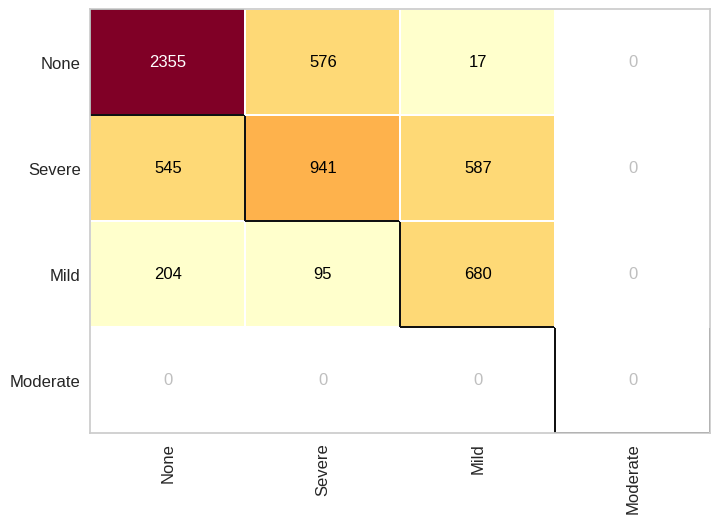

In [21]:
confusao = ConfusionMatrix(modelo, classes=['None', 'Severe', 'Mild', 'Moderate'])
confusao.fit(X_treinamento, y_treinamento)
confusao.score(X_teste, y_teste)
confusao.poof
# a linha diagonal são os acertos !